# Fitting Quadratics

A variation on [How does a neural net really work][1].

[1]: https://www.kaggle.com/code/jhoward/how-does-a-neural-net-really-work

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from ipywidgets import interact
from functools import partial

In [2]:
def quad(a, b, c, x):
    return a*x**2 + b*x + c

In [3]:
def mk_quad(a,b,c):
    return partial(quad, a, b, c)

In [4]:
f = mk_quad(3,2,1)

In [5]:
x = np.linspace(-2, 2, num=20)

In [6]:
y = f(x)
y

array([ 9.        ,  7.02770083,  5.32132964,  3.88088643,  2.70637119,
        1.79778393,  1.15512465,  0.77839335,  0.66759003,  0.82271468,
        1.24376731,  1.93074792,  2.88365651,  4.10249307,  5.58725762,
        7.33795014,  9.35457064, 11.63711911, 14.18559557, 17.        ])

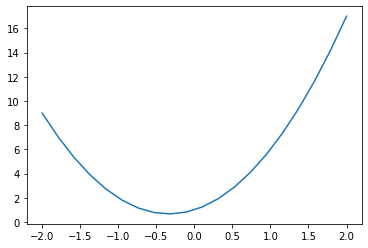

In [7]:
plt.plot(x,y)

In [8]:
def noise(scale, size):
    return np.random.normal(scale=scale, size=size)

def add_noise(x, mult_scale, add_scale):
    return x*(1+noise(mult_scale, x.shape)) + noise(add_scale, x.shape)

In [9]:
np.random.seed(42)
z = add_noise(f(x), 0.3, 1.5)
z

array([12.53960137,  6.39753234,  6.45659121,  3.51697592,  1.69968532,
        1.83788952, -0.02410942,  1.52115021, -0.32739293,  0.51908569,
        0.16829226,  4.43940317,  3.0727315 ,  0.161161  ,  3.9298069 ,
        4.26887331,  6.82548595,  9.79469402,  8.3290578 , 10.09254298])

In [10]:
def mse(preds, acts):
    return ((preds-acts)**2).mean()

## Fit a quadratic by eye

In [60]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a,b,c):
    f = mk_quad(a,b,c)
    preds = f(x)
    loss = mse(preds, z)

    plt.scatter(x,z, color='#33669980')
    plt.ylim(-1, 14)
    plt.plot(x, preds, color='#cc333380')
    plt.title(f"mse= {loss:2}")
    plt.show()

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

## Fit a quadratic by gradient descent

Using PyTorch's ability to compute gradient to do gradient descent.

In [12]:
def _quad_mse(params, x, y):
    f = mk_quad(*params)
    return mse(f(x), y)

x = torch.linspace(-2, 2, steps=20)

np.random.seed(42)
y = add_noise(f(x), 0.3, 1.5)

quad_mse = partial(_quad_mse, x=x, y=y)

In [13]:
quad_mse([1.5, 1.5, 1.5])

tensor(5.8336, dtype=torch.float64)

In [14]:
abc = torch.tensor([1.5, 1.5, 1.5])
abc.requires_grad_()

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [15]:
loss = quad_mse(abc)

In [16]:
loss

tensor(5.8336, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [17]:
loss.backward()

In [18]:
abc.grad

tensor([-5.1419,  2.8472, -1.1009])

In [20]:
with torch.no_grad():
    abc -= abc.grad * 0.01
    loss = quad_mse(abc)

print(f"{loss=:0.2}")

loss=5.5


In [56]:
n = 5
lr = 0.001

for i in range(n):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad():
        abc -= abc.grad * lr
        loss = quad_mse(abc)
    print(f"step={i}, params={abc} {loss=:0.4}")

step=0, params=tensor([2.7059, 0.7729, 0.4888], requires_grad=True) loss=2.549
step=1, params=tensor([2.6545, 0.7224, 0.4815], requires_grad=True) loss=2.46
step=2, params=tensor([2.6023, 0.6714, 0.4740], requires_grad=True) loss=2.401
step=3, params=tensor([2.5496, 0.6200, 0.4664], requires_grad=True) loss=2.373
step=4, params=tensor([2.4969, 0.5683, 0.4588], requires_grad=True) loss=2.377


In [57]:
def plot_quad(a,b,c):
    f = mk_quad(a,b,c)
    preds = f(x)
    loss = mse(preds, z)

    plt.scatter(x,z, color='#33669980')
    plt.ylim(-1, 14)
    plt.plot(x, preds, color='#cc333380')
    plt.title(f"mse= {loss:2}")
    plt.show()

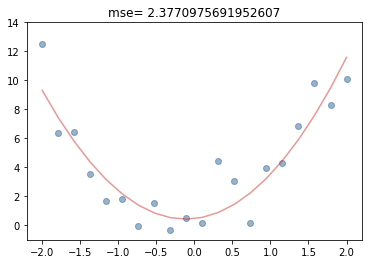

In [59]:
plot_quad(*abc.detach().numpy())